In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import scipy 

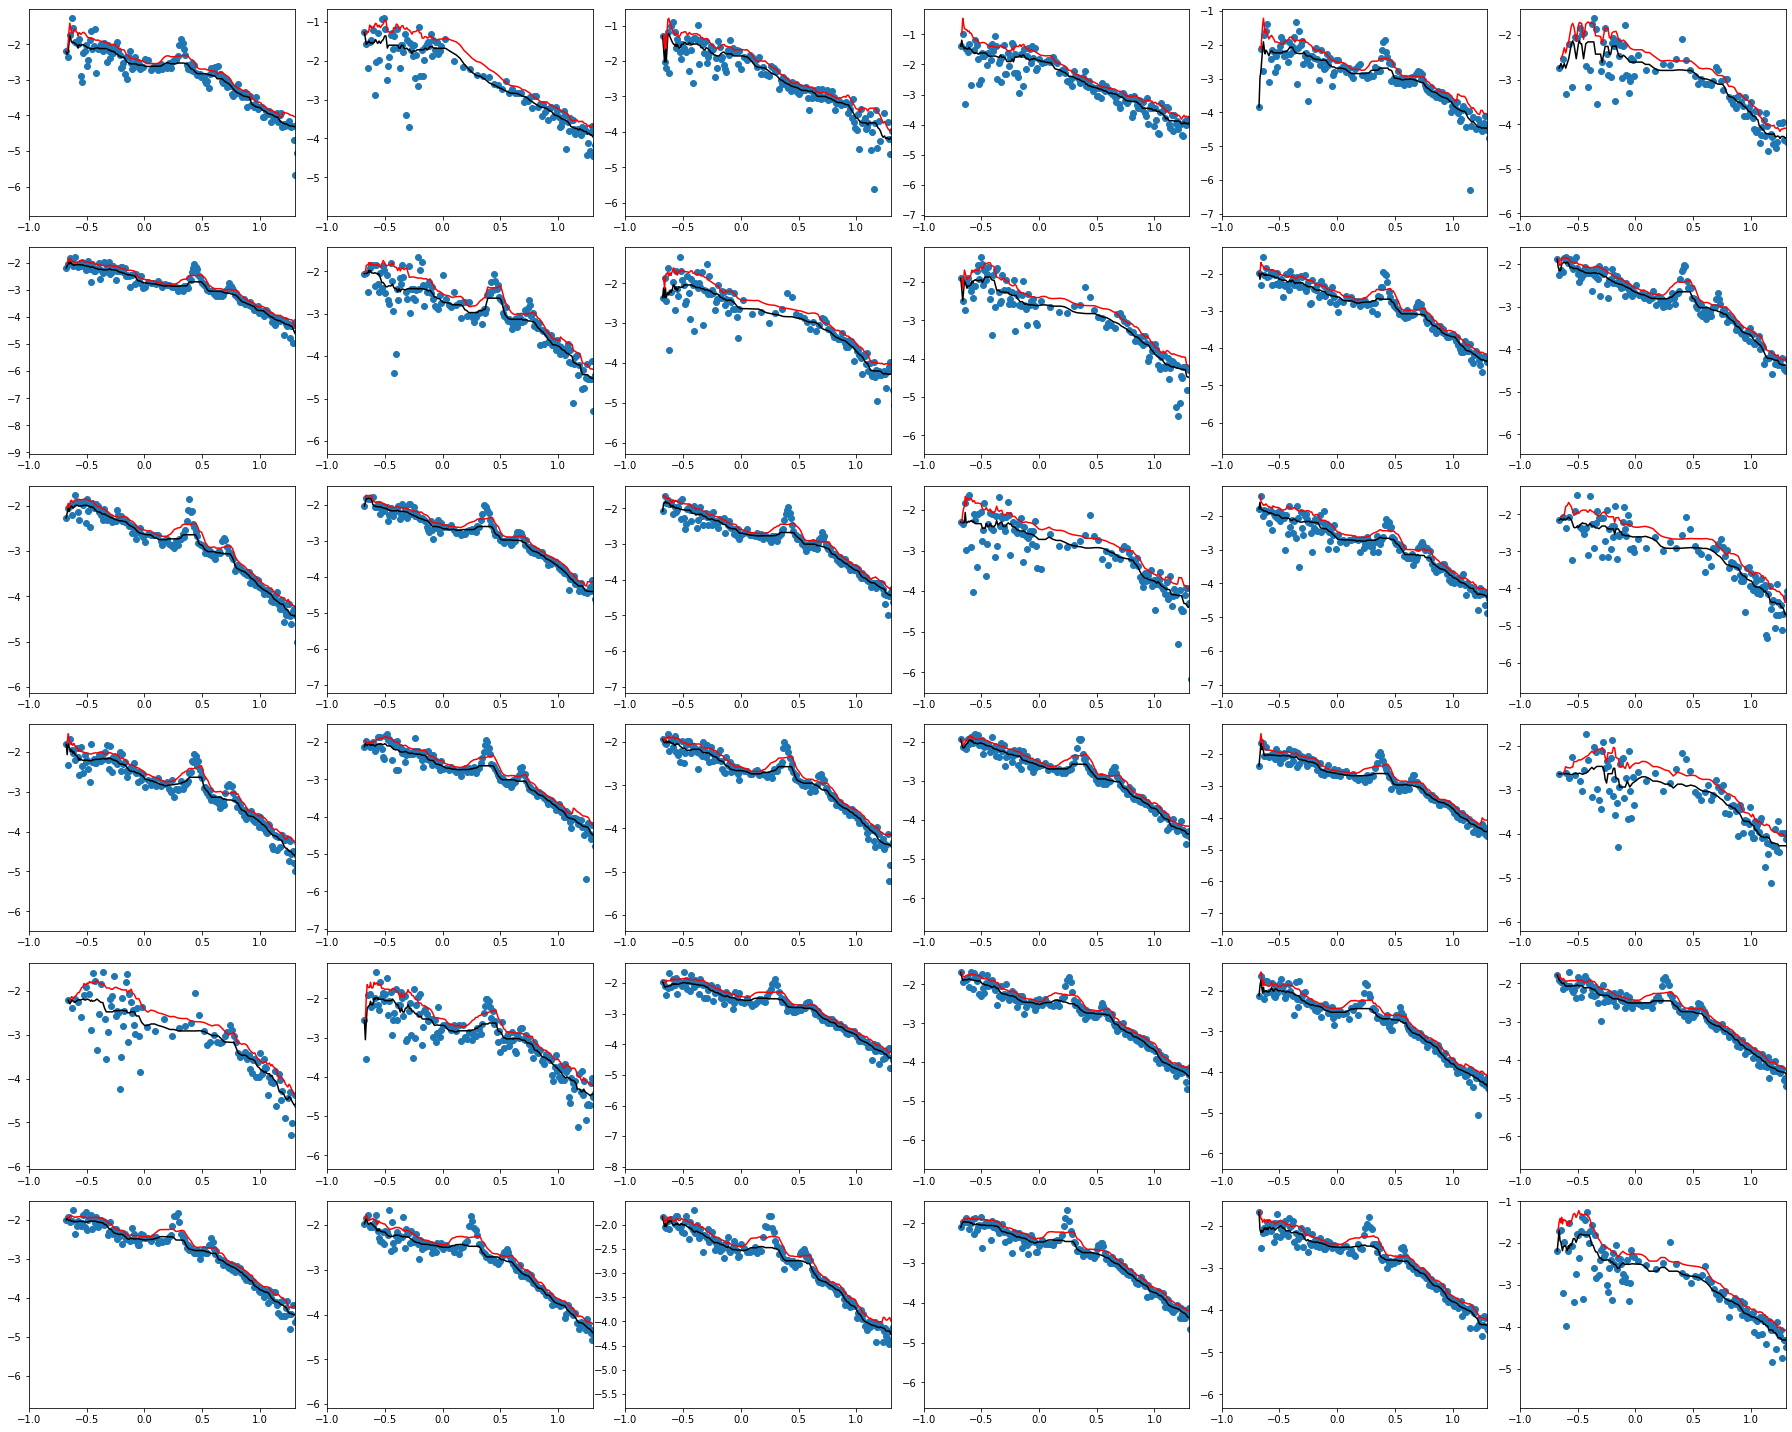

In [63]:
obsids = list(pd.read_csv('/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/src/development/testing/topical/making_pds/first_try/temp.txt')['obsid'])

fig, axs = plt.subplots(6,6, figsize=(25,20))

counter = 0
for i in range(6):
    for j in range(6):
        ax = axs[i,j]

        obsid = obsids[counter]

        df = pd.read_csv('/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/older/code/xspec_related/post-processing/initial/pds_plots/plot_dir/plot_data_raw/'+obsid+'_plot-data.csv')
        time, power = (pd.Series(np.log10(df[i])) for i in ['x','y'])

        xlim = (np.log10(0.1), np.log10(20))

        mask = np.logical_and(time>xlim[0], time<xlim[1])
        ax.scatter(time, power)
        x = time.rolling(20, min_periods=1).mean()
        rolling_power = power.rolling(20, min_periods=1)
        y = rolling_power.median()
        stds = 0.75*rolling_power.std()

        time, power, = (i[mask] for i in (time, power, ))

        ax.plot(x,y, color='black')
        ax.plot(x,y+stds, color='red')
       
        ax.set(xlim=xlim)

        counter += 1

fig.tight_layout()
plt.show()
